<a href="https://colab.research.google.com/github/15Shashank/CUSTOMER_SEGMENTATION-ML-/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and Analysis

In [2]:
#data loading from csv to pandas dataframe
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# frist five rows of dataframe
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

Choosing the Annual Income Column & Spending Score

In [5]:
X = customer_data.iloc[:, [3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

CHOOSING THE NUMBER OF CLUSTERS
(WCSS-> Within Cluster Sum of Squares)

In [6]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

ELBOW GRAPH PLOTTING

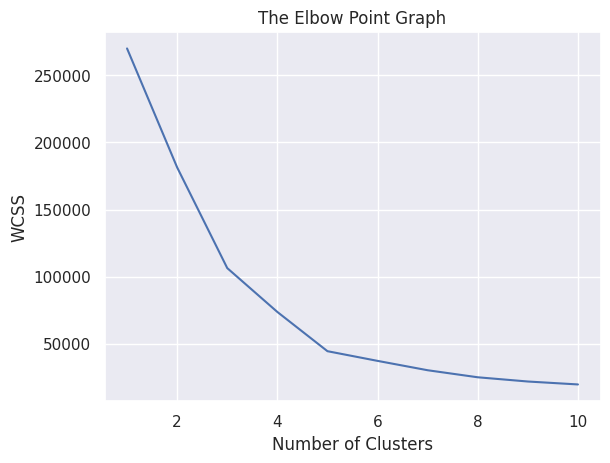

In [7]:
# PLOT AN ELBOW GRAPH

sns.set()
plt.pyplot.plot(range(1,11), wcss)
plt.pyplot.title('The Elbow Point Graph')
plt.pyplot.xlabel('Number of Clusters')
plt.pyplot.ylabel('WCSS')
plt.pyplot.show()

Optimum Number of clusters = 5
Training the k means Clustering Model

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


VISUALIZING ALL THE CLUSTERS

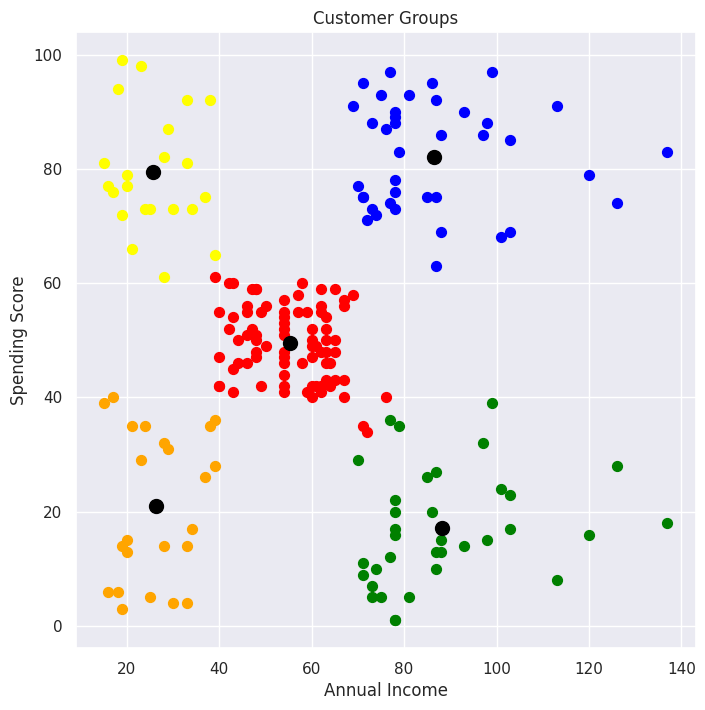

In [9]:
# plotting all the cluster and their centroids
plt.pyplot.figure(figsize=(8,8))
plt.pyplot.scatter(X[Y==0,0],X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.pyplot.scatter(X[Y==1,0],X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.pyplot.scatter(X[Y==2,0],X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.pyplot.scatter(X[Y==3,0],X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.pyplot.scatter(X[Y==4,0],X[Y==4,1], s=50, c='orange', label='Cluster 5')

# plot the centroids
plt.pyplot.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

# graph label
plt.pyplot.title('Customer Groups')
plt.pyplot.xlabel('Annual Income')
plt.pyplot.ylabel('Spending Score')
plt.pyplot.show()

In [10]:
kmeans.predict([[137 , 83]])

array([2], dtype=int32)

In [11]:
import pickle

In [12]:
filename = 'finalized_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [13]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))


In [14]:
input_data= [[77,74]]

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = kmeans.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The customer belongs to Cluster 1')
elif (prediction[0] == 1):
  print('The customer belongs to Cluster 2')
elif (prediction[0] == 2):
  print('The customer belongs to Cluster 3')

elif (prediction[0] == 3):
  print('The customer belongs to Cluster 4')
elif (prediction[0] == 4):
  print('The customer belongs to Cluster 5')

else:
  print('Error')

[2]
The customer belongs to Cluster 3
